# Visualize seed genes

In [40]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from config import PIPELINE_RUN_DIR, SEED_SETS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
seeds_stats_path = os.path.join(PIPELINE_RUN_DIR, "main/results/mqc_summaries/input_seeds_mqc.tsv")

def split_seed_file_id(seed_file_name):
    """
    Splits the seed file id into its components.
    """
    # Split the seed file name by underscores
    parts = seed_file_name.split(".")
    
    # Extract the components
    seed_id = parts[0]
    network_id = ".".join(parts[1:])
    
    return pd. Series([seed_id, network_id])

Read data

In [43]:
import pandas as pd

# Example DataFrame
df = pd.DataFrame({
    'name': ['Smith, Alice', 'Jones, Bob', 'Brown, Charlie']
})

# Custom split function
def custom_split(name):
    last, first = name.split(', ')
    return pd.Series([first, last])

# Apply function and assign to new columns
df[['first_name', 'last_name']] = df['name'].apply(custom_split)

print(df)

             name first_name last_name
0    Smith, Alice      Alice     Smith
1      Jones, Bob        Bob     Jones
2  Brown, Charlie    Charlie     Brown


In [46]:
df = pd.read_csv(seeds_stats_path, sep="\t")
seeds_config_df = pd.DataFrame.from_dict(SEED_SETS)

# Add a new column "Seeds total" that is the sum of "Seeds" and "Not in network"
df["Seeds total"] = df["Seeds"] + df ["Not in network"]

# Split the id into seed_id and network_id
df[["seed_id", "network_id"]] = df["Seed file"].apply(split_seed_file_id)
print(df.to_string())

                                                   Seed file  Seeds  Not in network  Seeds total seed_id                                           network_id
0                    UC.hippie.v2_3_medium_confidence.Symbol     74               2           76      UC                 hippie.v2_3_medium_confidence.Symbol
1     HD.nedrex.reviewed_proteins_exp_high_confidence.Symbol     34               6           40      HD  nedrex.reviewed_proteins_exp_high_confidence.Symbol
2       LUAD.string.human_physical_links_v12_0_min700.Symbol    223              57          280    LUAD      string.human_physical_links_v12_0_min700.Symbol
3                  LUAD.hippie.v2_3_medium_confidence.Symbol    263              17          280    LUAD                 hippie.v2_3_medium_confidence.Symbol
4                LUAD.string.human_links_v12_0_min700.Symbol    262              18          280    LUAD               string.human_links_v12_0_min700.Symbol
5         HD.string.human_physical_links_v12_0_min90

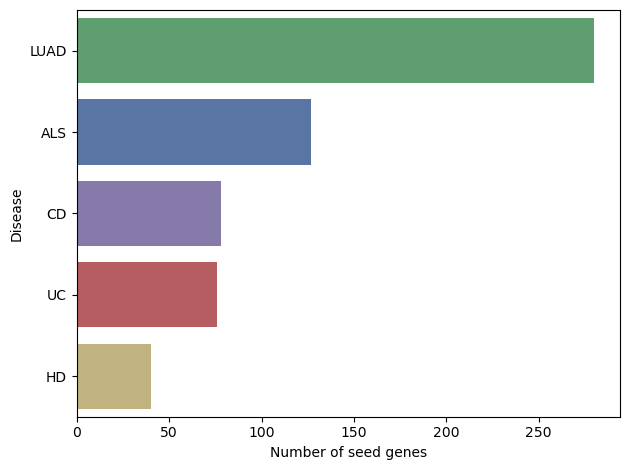

In [47]:
seed_sets_df = df[["seed_id", "Seeds total"]].drop_duplicates().sort_values(by="Seeds total", ascending=False)
# Create bar plot
sns.barplot(data=seed_sets_df, y='seed_id', x='Seeds total', hue="seed_id", palette=dict(zip(seeds_config_df.short, seeds_config_df.color)))

# Optional: add labels and title
plt.xlabel('Number of seed genes')
plt.ylabel('Disease')
plt.tight_layout()
plt.show()